In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create DataFrames for export products
df_export = pd.read_csv("../Top Products/Top Products Export.CSV")
df_export.head()

,E_COMMODITY_LDESC,ALL_VAL_YR,DIST_NAME,CTY_NAME,time,COMM_LVL,E_COMMODITY
0,AIRCRAFT AND PARTS,1.150000e+11,TOTAL FOR ALL DISTRICTS,TOTAL FOR ALL COUNTRIES,2013-12,HS2,88
1,AIRCRAFT AND PARTS,1.250000e+11,TOTAL FOR ALL DISTRICTS,TOTAL FOR ALL COUNTRIES,2014-12,HS2,88
2,AIRCRAFT AND PARTS,1.320000e+11,TOTAL FOR ALL DISTRICTS,TOTAL FOR ALL COUNTRIES,2015-12,HS2,88
3,AIRCRAFT AND PARTS,1.350000e+11,TOTAL FOR ALL DISTRICTS,TOTAL FOR ALL COUNTRIES,2016-12,HS2,88
4,AIRCRAFT AND PARTS,1.310000e+11,TOTAL FOR ALL DISTRICTS,TOTAL FOR ALL COUNTRIES,2017-12,HS2,88


In [3]:
# Create DataFrames for import products
df_import = pd.read_csv("../Top Products/Top Products Import.CSV")
df_import.head()

,I_ENDUSE_LDESC,GEN_VAL_YR,I_COMMODITY,time,COMM_LVL
0,AIRCRAFT AND PARTS,2.941987e+10,88,2013-12,HS2
1,AIRCRAFT AND PARTS,3.435360e+10,88,2014-12,HS2
2,AIRCRAFT AND PARTS,3.518110e+10,88,2015-12,HS2
3,AIRCRAFT AND PARTS,3.090232e+10,88,2016-12,HS2
4,AIRCRAFT AND PARTS,3.077662e+10,88,2017-12,HS2


In [4]:
# Aggregate by commodity for export
export_top5 = df_export.groupby("E_COMMODITY_LDESC")["ALL_VAL_YR"].sum().nlargest(5)
export_top5

E_COMMODITY_LDESC
NUCLEAR PARTS                       1.245000e+12
ELECTRICAL PARTS AND ACCESSORIES    1.027000e+12
MINERAL FUELS AND PRODUCTS          8.360055e+11
VEHICLES, PARTS AND ACCESSORIES     7.830000e+11
AIRCRAFT AND PARTS                  7.770000e+11
Name: ALL_VAL_YR, dtype: float64

In [5]:
# Aggregate by commodity for import
import_top5 = df_import.groupby("I_ENDUSE_LDESC")["GEN_VAL_YR"].sum().nlargest(5)
import_top5

I_ENDUSE_LDESC
ELECTRICAL PARTS AND ACCESSORIES    1.984000e+12
NUCLEAR PARTS                       1.980000e+12
VEHICLES, PARTS AND ACCESSORIES     1.662000e+12
MINERAL FUELS AND PRODUCTS          1.501000e+12
MEDICAL PARTS AND ACCESSORIES       4.802935e+11
Name: GEN_VAL_YR, dtype: float64

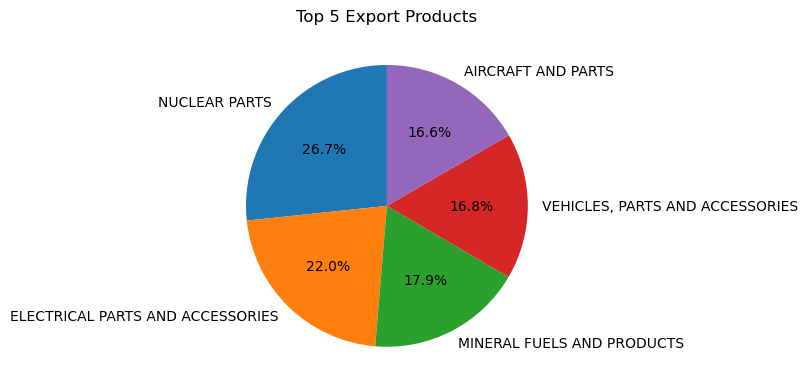

In [6]:
# Plot Pie Charts for Export
plt.figure(figsize=(10, 6))

# Pie chart for Top 5 Exports
plt.subplot(121)
plt.pie(export_top5, labels=export_top5.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Export Products")
plt.show()

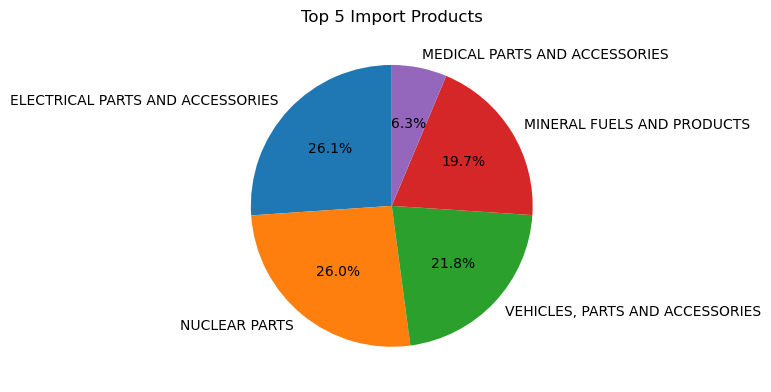

In [7]:
# Plot Pie Charts for Export and Import
plt.figure(figsize=(10, 6))
# Pie chart for Top 5 Imports
plt.subplot(122)
plt.pie(import_top5, labels=import_top5.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Import Products")
plt.show()

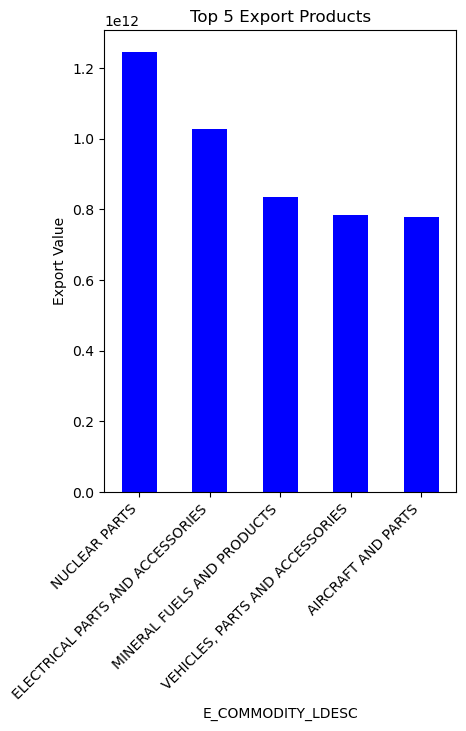

In [8]:
# Plot Bar Charts for Top 5 Exports
plt.figure(figsize=(10, 6))

# Bar chart for Top 5 Exports
plt.subplot(121)
export_top5.plot(kind='bar', color='b')
plt.title("Top 5 Export Products")
plt.ylabel("Export Value")
plt.xticks(rotation=45, ha='right')
plt.show()

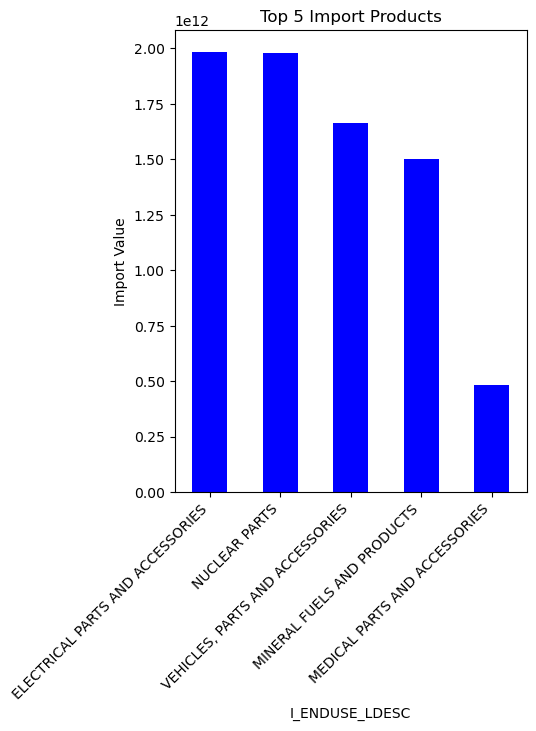

In [9]:
# Plot Bar Charts for Top 5 Imports
plt.figure(figsize=(10, 6))
# Bar chart for Top 5 Imports
plt.subplot(122)
import_top5.plot(kind='bar', color='b')
plt.title("Top 5 Import Products")
plt.ylabel("Import Value")
plt.xticks(rotation=45, ha='right')
plt.show()

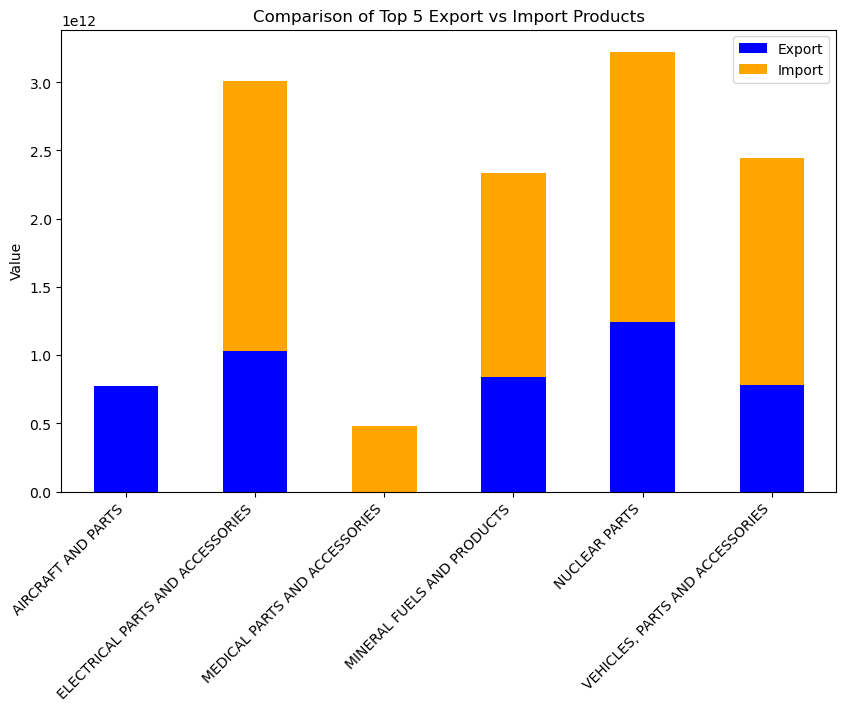

In [10]:
# Stacked Bar Chart for comparison of Top 5 Export vs Import
top5_comparison = pd.DataFrame({
    "Export": export_top5,
    "Import": import_top5
})

top5_comparison.plot(kind='bar', stacked=True, figsize=(10, 6), color=['b', 'orange'])
plt.title("Comparison of Top 5 Export vs Import Products")
plt.ylabel("Value")
plt.xticks(rotation=45, ha='right')
plt.show()